##### Homework 2: Probabilistic Inference, and Logistic Regression

## (60 points + 5 Extra Credit Points)

### Note: Best solution to each problem or exercise will get receive extra credit of 5 points



## Part 1: Learning Goal

The goal of the first part of this homework is to gain more intuition of Bayesian inference, and more generally about **estimating probability distributions from data samples**. 

### Theoretical Exercise 1: Coin Tossing and Bayesian Inference (10 points)

Suppose you find an ancient and invaluable coin dropping in a cave, and you ask yourself "What's the probability that this coin will land on head when I toss it?" You recall that you've learned Bayesian inference method and want to evaluate your hypothesis on the probability that this coin land on head, given the coin tossing event that you can perform. The most natural assumption about a coin toss is that the distribution of the observed outcomes is a binomial distribution, which has two parameters $n$ and $\theta$ which capture the distribution of $n$ independent binary random events that have a postivie outcome with probability $\theta$. In our case $n$ is the number of coin tosses, and $\theta$ could be the probability of coin coming up heads. 

* Suppose that your experiments with the data $D$ shows $n_H$, $n_T$ is the number of landing heads, and tails, respectively, in your $n = n_H + n_T$ tosses. Then, argue that the likelihood is 

\begin{equation}
P(D \mid \theta)=\left(\begin{array}{c}
n_{H}+n_{T} \\
n_{H}
\end{array}\right) \theta^{n_{H}}(1-\theta)^{n_{T}}
\end{equation}

* Show that the Maximum Likelihood Estimate (MLE) of the optimal hypothesis is that 

\begin{equation}
\hat{\theta}_{MLE} = \frac{n_H}{n_H + n_T},
\end{equation}

and comment on the connection between the frequentist's approach of estimating the probability that the coin will land head and the result you obtain from MLE.

* Suppose now you encounter a fortune teller which tells you that your prior belief of $\theta$ should be somewhat model by the Beta distribution: 

\begin{equation}
P(\theta)=\frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha, \beta)},
\end{equation}

where $B(\alpha, \beta)=\frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha+\beta)}$ is the normalization constant, which gaurantees that the prior belief is normalized to 1.

Show that if you totally buy your fortune teller's suggestions then
\begin{equation}
P(\theta \mid D) \propto \theta^{n_{H}+\alpha-1}(1-\theta)^{n_{T}+\beta-1}.
\end{equation}

* Now we want to solve for the optimal hypothesis, taking into account the prior belief from your fortune teller, is by Maximum a Posteriori Probability Estimation (MAP). Show that 

\begin{equation}
\hat{\theta}_{MAP} = \frac{n_H +\alpha -1}{n_H + n_T + \beta + \alpha -2}.
\end{equation}

* Comment on 
1. the relationship between the hypotheses obtained from MAP and MLE in the limit when $n \rightarrow \infty$
2. what does $\alpha$ and $\beta$ in your prior mean? 

* Both MAP and MLE are two ways to get an estimator; however, there's much much more information in $P(\theta|D)$ that we haven't used. It's a shame that we simply compute the mode and throw away all other information. A "true" Bayesian approach is to use the posterior perdictive distribution directly to make prediction about the label $Y$ of a test sample with features $X$ as 

\begin{equation}
P(Y \mid D, X)=\int_{\theta} P(Y, \theta \mid D, X) d \theta=\int_{\theta} P(Y \mid \theta, D, X) P(\theta \mid D) d \theta.
\end{equation}

Unfortunately, in most problems, this integral is intractable and requires sampling techniques such as Monte Carlo to approximate the distribution.
However, in our coin tossing example, it's doable. Show by using the chain rule of probability ($P(A, B \mid C)=P(A \mid B, C) P(B \mid C)$) that the true Bayesian approach for the coin tossing example  yields 

\begin{equation}
P(head \mid D)= E[\theta \mid D] = \frac{n_{H}+\alpha}{n_{H}+\alpha+n_{T}+\beta},
\end{equation}
where we defined $P(\text { heads } \mid D, \theta)=P(\text { heads } \mid \theta)=\theta$.


### Theoretical Exercise 2: MAP and Regularization (10 points)

Suppose your data set is generated from a linear signal with Gaussian white noise 
\begin{equation}
y=\mathbf{w}^{T}_{true} \mathbf{x}+\epsilon \text { with } \quad \epsilon \in \mathcal{N}\left(0, \sigma_{\epsilon}^{2}\right)
\end{equation}

And you hypothesize that the dataset is generated from the discriminative model 
\begin{equation}
P(y \mid x, \theta)=\mathcal{N}\left(\mathbf{w}^{T} \mathbf{x}, \sigma^{2}\right).
\end{equation}

In lecture 5, we claim that we can perform MAP estimate with Gaussian and Laplace prior on the training dataset and obtain the same optimization problem as the Ridge and LASSO, respectively. Show that such claim is correct. 

## Part 2: Learning Goal

The goal of the second part of this homework is to understand multi-class classification better, both theoretically and numerically. We hope you'll appreciate that this simple machine learning models can do so so much!

### Theoretical Problem 1: Convexity of classification loss (10 points)

The empirical risk in Logistic regression taken to be the negative log-likelihood is messy; namely, 

$$
\ell(\mathbf{w}) \equiv \sum_{i=1}^{n} \log \left(1+e^{-y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}\right)}\right),
$$
where $\{(\mathbf{x}_{1},y_1),\dots, (\mathbf{x}_{n},y_n) \}$ is the training set. Although we don't know how to obtain the solution to this optimization in one-shot as in the regularized linear models, we claim that we'll perform iterative gradient descent to search for the global minima, based on the assumption that this loss function is convex. Revisit the definition of convex function in ([Wikipedia](mathbf{x}_{1},y_1)), and show the following:

* A differentiable convex function of an affine function (a linear map) is a convex function. In particular, let $f: \mathbb{R}^{m} \rightarrow \mathbb{R}$ be a differentiable convex function, $A \in \mathbb{R}^{m \times n}, \text { and } b \in \mathbb{R}^{m}$. Define an affine transformation $g: \mathbb{R}^{n} \rightarrow \mathbb{R}$ as $g(\mathbf{y})=f(A \mathbf{y}+b)$. Show that the Hessian of $g$ with respect to $\mathbf{y}$
is
$$\newline
\nabla_{\mathbf{y}}^{2} g(\mathbf{y})=A^{T} \nabla_{\mathbf{x}}^{2} f(A\mathbf{y}+b) A \in \mathbb{R}^{n \times n}.\newline
$$
Given that $f$ is convex, argue that $\nabla_{\mathbf{y}}^{2} g(\mathbf{y})$ is positive semidefinite for all $\mathbf{y} \in \mathbb{R}^n$, and hence conclude that $g$ is convex. 

* Now argue that the negative log-likelihood is convex.

An alternative empirical risk to the log-likelihood for logistic regression is the so called **cross-entropy loss**, which is defined to be 

$$
\ell(\mathbf{w},b) \equiv \sum_{i=1}^{n}\left(-y_i \log[\sigma(\mathbf{w}^{T} \mathbf{x}_{i} + b)] -(1-y_i)\log[1- \sigma(\mathbf{w}^{T} \mathbf{x}_{i} + b)] \right),
$$

where $\sigma(x) = \frac{1}{1+e^{-x}}$ is the sigmoid function.

* Show that the cross-entropy loss is also convex.

## Phases of the Ising Model with Logistic Regression

### Overview

The Hamiltonian for the classical Ising model is given by

$$ H = -J\sum_{\langle ij\rangle}S_{i}S_j,\qquad \qquad S_j\in\{\pm 1\} $$

where the lattice site indices $i,j$ run over all nearest neighbors of a 2D square lattice, and $J$ is some arbitrary interaction energy scale. We adopt periodic boundary conditions. Onsager proved that this model undergoes a thermal phase transition in the thermodynamic limit from an ordered ferromagnet with all spins aligned to a disordered phase at the critical temperature $T_c/J=2/\log(1+\sqrt{2})\approx 2.26$. For any finite system size, this critical point is expanded to a critical region around $T_c$.

An interesting question to ask is whether one can train a statistical model to distinguish between the two phases of the Ising model. If successful, this can be used to locate the position of the critical point in more complicated models where an exact analytical solution has so far remained elusive. 

In other words, given an Ising state, we would like to classify whether it belongs to the ordered or the disordered phase, without any additional information other than the spin configuration itself. This categorical machine learning problem is well suited for logistic regression. Notice that, for the purposes of applying logistic regression, the 2D spin state of the Ising model will be flattened out to a 1D array, so it will not be easy to learn information about the structure of the contiguous ordered 2D domains [see figure below]. Such information can be incorporated using other methods such as multi-layer deep convolutional neural networks (CNNs), see Secs. IX, X and XI of the review.

## The 2D Ising Dataset

To this end, we consider the 2D Ising model on a $40\times 40$ square lattice, and use Monte-Carlo (MC) sampling to prepare $10^4$ states at every fixed temperature $T$ out of a pre-defined set. Using Onsager's criterion, we can assign a label to each state according to its phase: $0$ if the state is disordered, and $1$ if it is ordered. Our goal is to predict the phase of a sample given the spin configuration.

It is well-known that, near the critical temperature $T_c$, the ferromagnetic correlation length diverges which, among other things, leads to a critical slowing down of the MC algorithm. Therefore, we expect identifying the phases to be harder in the critical region. With this in mind, consider the following three types of states: ordered ($T/J<2.0$), critical ($2.0\leq T/J\leq 2.5)$ and disordered ($T/J>2.5$). We use both ordered and disordered states to train the logistic regressor and once the supervised training procedure is complete, we evaluate the performance of our classification model on unseen ordered, disordered and critical states. 

In [8]:
import numpy as np

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

np.random.seed() # shuffle random seed generator

# Ising model parameters
L=40 # linear system size
J=-1.0 # Ising interaction
T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit

In [21]:
##### prepare training and test data sets

import pickle,os
from sklearn.model_selection import train_test_split

###### define ML parameters
num_classes=2
train_to_test_ratio=0.5 # training samples

# path to data directory: 
# download IsingData folder from https://github.com/TChotibut/ml-for-physical-scientists/tree/main/Homework
# and put in your currect working directory
path_to_data=os.getcwd()+'/IsingData/' 


# load data
file_name = "Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(path_to_data+file_name,'rb')) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(path_to_data+file_name,'rb')) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

# divide data into ordered, critical and disordered
X_ordered=data[:70000,:]
Y_ordered=labels[:70000]

X_critical=data[70000:100000,:]
Y_critical=labels[70000:100000]

X_disordered=data[100000:,:]
Y_disordered=labels[100000:]

del data,labels

# define training and test data sets
X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))

# pick random data points from ordered and disordered states 
# to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=train_to_test_ratio)

# full data set
X=np.concatenate((X_critical,X))
Y=np.concatenate((Y_critical,Y))

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_critical.shape[0], 'critical samples')
print(X_test.shape[0], 'test samples')

X_train shape: (65000, 1600)
Y_train shape: (65000,)

65000 train samples
30000 critical samples
65000 test samples


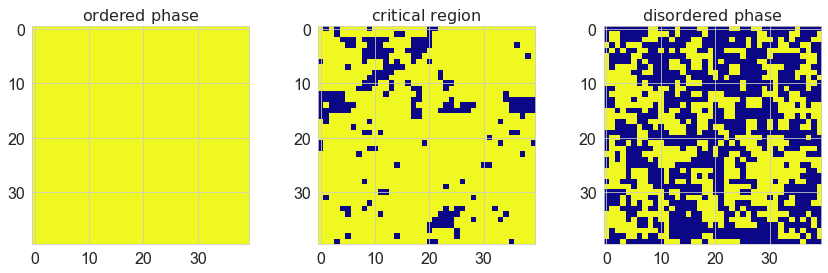

In [22]:
##### plot a few Ising states
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# set colourbar map
cmap_args=dict(cmap='plasma_r')

# plot states
fig, axarr = plt.subplots(nrows=1, ncols=3)

axarr[0].imshow(X_ordered[20001].reshape(L,L),**cmap_args)
axarr[0].set_title('$\\mathrm{ordered\\ phase}$',fontsize=16)
axarr[0].tick_params(labelsize=16)

axarr[1].imshow(X_critical[10001].reshape(L,L),**cmap_args)
axarr[1].set_title('$\\mathrm{critical\\ region}$',fontsize=16)
axarr[1].tick_params(labelsize=16)

im=axarr[2].imshow(X_disordered[50001].reshape(L,L),**cmap_args)
axarr[2].set_title('$\\mathrm{disordered\\ phase}$',fontsize=16)
axarr[2].tick_params(labelsize=16)

fig.subplots_adjust(right=2.0)

plt.show()

Due to the convexity of the loss function for logistic regression, we should be able to in principle perform gradient descent to find the unique minima. However, for large sample size like this, it runs very slowly to converge.There's built-in numerical toolboxes to accelerate convergence. Here, we compare the performance of two different optimization routines: a `liblinear` [the default one for scikit's logistic regression], and stochastic gradient descent (SGD) [see Mehta's Sec. IV for more details].

It is important to note that all these methods have built-in regularizers. Indeed, we did not discuss the role of the regularisor explicitly in the context of Logistic Regression extensively, yet this concept is crucial in order to prevent overfitting when the gradient is small and the computer confuses that it already has reached the global minima; and we encourage the interested students to play with the different regularization types and regularization strengths and compare model performances. 

Below, we define the accuracy of a classification model on a given data set as the percentage of correctly classified data points. Comparing the accuracy on the training and test data, we obtain a good estimate of the degree of overfitting. Well-trained models do not overfit the data, which is reflected in an almost equal performance on the training and test data sets.

accuracy: train, test, critical
liblin: 0.7252, 0.6872, 0.6198
SGD: 0.4840, 0.4678, 0.5211
finished computing 1/11 iterations
accuracy: train, test, critical
liblin: 0.7252, 0.6872, 0.6198
SGD: 0.4937, 0.4735, 0.5185
finished computing 2/11 iterations
accuracy: train, test, critical
liblin: 0.7252, 0.6872, 0.6198
SGD: 0.4787, 0.4442, 0.5028
finished computing 3/11 iterations
accuracy: train, test, critical
liblin: 0.7252, 0.6872, 0.6198
SGD: 0.5206, 0.4831, 0.5910
finished computing 4/11 iterations
accuracy: train, test, critical
liblin: 0.7252, 0.6872, 0.6198
SGD: 0.6720, 0.6414, 0.6796
finished computing 5/11 iterations
accuracy: train, test, critical
liblin: 0.7252, 0.6872, 0.6198
SGD: 0.6388, 0.6145, 0.6912
finished computing 6/11 iterations
accuracy: train, test, critical
liblin: 0.7252, 0.6872, 0.6201
SGD: 0.4597, 0.4634, 0.3333
finished computing 7/11 iterations
accuracy: train, test, critical
liblin: 0.7242, 0.6868, 0.6221
SGD: 0.4597, 0.4634, 0.3333
finished computing 8/11 ite

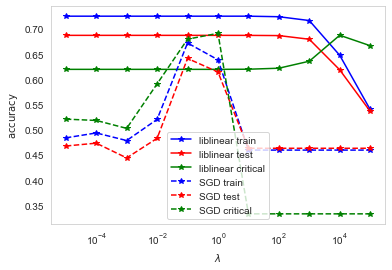

In [23]:
###### apply logistic regression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier


# define regularisation parameter
lmbdas=np.logspace(-5,5,11)

# preallocate data
train_accuracy=np.zeros(lmbdas.shape,np.float64)
test_accuracy=np.zeros(lmbdas.shape,np.float64)
critical_accuracy=np.zeros(lmbdas.shape,np.float64)

train_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
test_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)

# loop over regularisation strength
for i,lmbda in enumerate(lmbdas):

    # define logistic regressor
    logreg=linear_model.LogisticRegression(C=1.0/lmbda,random_state=1,verbose=0,max_iter=1E3,tol=1E-5)

    # fit training data
    logreg.fit(X_train, Y_train)

    # check accuracy
    train_accuracy[i]=logreg.score(X_train,Y_train)
    test_accuracy[i]=logreg.score(X_test,Y_test)
    critical_accuracy[i]=logreg.score(X_critical,Y_critical)
    
    print('accuracy: train, test, critical')
    print('liblin: %0.4f, %0.4f, %0.4f' %(train_accuracy[i],test_accuracy[i],critical_accuracy[i]) )

    # define SGD-based logistic regression
    logreg_SGD = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=lmbda, max_iter=100, 
                                           shuffle=True, random_state=1, learning_rate='optimal')

    # fit training data
    logreg_SGD.fit(X_train,Y_train)

    # check accuracy
    train_accuracy_SGD[i]=logreg_SGD.score(X_train,Y_train)
    test_accuracy_SGD[i]=logreg_SGD.score(X_test,Y_test)
    critical_accuracy_SGD[i]=logreg_SGD.score(X_critical,Y_critical)
    
    print('SGD: %0.4f, %0.4f, %0.4f' %(train_accuracy_SGD[i],test_accuracy_SGD[i],critical_accuracy_SGD[i]) )

    print('finished computing %i/11 iterations' %(i+1))

# plot accuracy against regularisation strength
plt.semilogx(lmbdas,train_accuracy,'*-b',label='liblinear train')
plt.semilogx(lmbdas,test_accuracy,'*-r',label='liblinear test')
plt.semilogx(lmbdas,critical_accuracy,'*-g',label='liblinear critical')

plt.semilogx(lmbdas,train_accuracy_SGD,'*--b',label='SGD train')
plt.semilogx(lmbdas,test_accuracy_SGD,'*--r',label='SGD test')
plt.semilogx(lmbdas,critical_accuracy_SGD,'*--g',label='SGD critical')

plt.xlabel('$\\lambda$')
plt.ylabel('$\\mathrm{accuracy}$')

plt.grid()
plt.legend()


plt.show()

## Interpreting the results

The first thing we can read off the figure above is the relative degree of overfitting. This information is contained in the difference in accuracy of our model on the training (blue) and test (red) datasets. Notice that the accuracy difference between test and training sets is significant but not unreasonable, within $10\%$. Interestingly, which optimizer performs better depends on the value of the regularization strength. Moreover, similar to the Linear Regression examples, we find that there exists a sweet spot for the regularization strength $\lambda$ that results in optimal performance of the logistic regressor, at about $\lambda\sim 10^{-1}$.

Due to the physics of the Ising model close to criticality, we expect that predicting the phase of a sample will become much more difficult close to the critical point. We can visually see this by looking at the states in the critical region, (see Fig. above and plot other examples). Notice that it is no longer easy even for a trained human eye to distinguish between the ferromagnetic and the disordered phases close to $T_c$. 

It is an interesting exercise to compare the training and test accuracies in the ordered and disordered phases to the accuracy of the model near the critical point (i.e. critical states). Recall that the model is not trained on critical states. Notice that the accuracy is about $10\%$ smaller for the critical states (green curves). 

## Numerical Exercise 1: (10 points) ##
<ul>
<li> Change the regularization to $L^1$, or $L^1+L^2$ (i.e. elastic net, see Notebook 2 for more details), and study the performance of the model.

<li> Try out different solvers supported by `LogisticRegression()`, [see online scikit documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). How do they compare to `liblinear` and `SGD`?

<li> One can expect the regressor to be maximally confused exactly at the critical point. Take the data states for the closest temperature, i.e. $T/J=2.5$, and check the performance of the model. Do we get an accuracy of about $50\%$? Does this depend on the proportion of ordered to disordered states in the training set?

</ul>

## Numerical Exercise 2: SoftMax and Multiclass Classification (20 points + 5 extra credits)




### Overview
A paradigmatic example of SoftMax regression is the MNIST classification problem. The goal is to find a statistical model which recognizes the ten handwritten digits. There are numerous practical applications of such a task, pretty much anywhere one can imagine dealing with large quantities of numbers (postal services, banks, etc.).


Yann LeCun and collaborators collected and processed $70000$ handwritten digits to produce what became known as the most widely used database in ML, called [MNIST](http://yann.lecun.com/exdb/mnist/). Each handwritten digit comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each the data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem is a generic SoftMax regression task. 

Ever since, the MNIST problem has become an important standard for benchmarking the performance of more sophisticated Machine Learning models. Often times, there are contests for finding a new constellation of hyperparameters and/or model architecture which results in a better accuracy for correctly classifying the digits.



* Follow the walkthrough https://datascienceplus.com/mnist-for-machine-learning-beginners-with-softmax-regression/, and implement softmax regression for handwritten digit recognition task! Show training and test accuracy as your final output results. 

* **(5 Extra Credits)** if you have time, take 10 pictures of your handwritten digits, corresponding to each digits. Convert them into appropriate gray scale image. Put those into your trained model, and see if your model can recognize your own handwritten digits correctly :) 